In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir

In [2]:
train_dir = 'trainall'
train_imgs = ['trainall/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

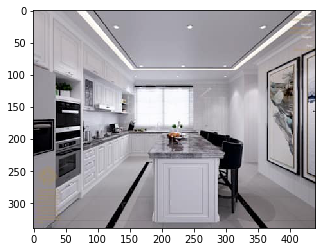

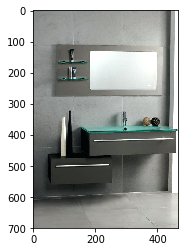

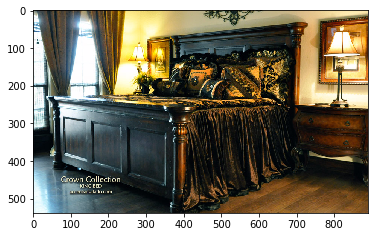

In [3]:
import matplotlib.image as mpimg
for ima in train_imgs[1000:1003]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [5]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg19 import decode_predictions

In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(2281, 224, 224, 3)
<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [7]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'new' in image:
            y.append(1)
        elif 'old' in image:
            y.append(0)
    return y

In [8]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)


2281
<class 'list'>
2281
<class 'numpy.ndarray'>
(2281,)
<class 'numpy.ndarray'>
(2281, 2)
320
<class 'list'>
320
<class 'numpy.ndarray'>
(320,)
<class 'numpy.ndarray'>
(320, 2)


# VGG19_MODEL1

In [9]:
# loading VGG19 model weights
model = VGG19(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)



(2281, 7, 7, 512)


In [10]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)

1824
(1824, 25088)


In [16]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


#history = model.fit(X_train, Y_train, epochs=5, batch_size=128,validation_data=(X_valid,Y_valid))
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=20,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])



Train on 1824 samples, validate on 457 samples
Epoch 1/20
1824/1824 [==============================] - 3s 2ms/sample - loss: 0.6965 - accuracy: 0.6190 - val_loss: 0.5251 - val_accuracy: 0.8096
Epoch 2/20
1824/1824 [==============================] - 2s 1ms/sample - loss: 0.4379 - accuracy: 0.8388 - val_loss: 0.3520 - val_accuracy: 0.8490
Epoch 3/20
1824/1824 [==============================] - 2s 1ms/sample - loss: 0.2841 - accuracy: 0.8860 - val_loss: 0.3577 - val_accuracy: 0.8293
Epoch 4/20
1824/1824 [==============================] - 2s 1ms/sample - loss: 0.1955 - accuracy: 0.9309 - val_loss: 0.2861 - val_accuracy: 0.8884
Epoch 5/20
1824/1824 [==============================] - 2s 1ms/sample - loss: 0.1162 - accuracy: 0.9682 - val_loss: 0.2685 - val_accuracy: 0.9059
Epoch 6/20
1824/1824 [==============================] - 2s 1ms/sample - loss: 0.0563 - accuracy: 0.9874 - val_loss: 0.2776 - val_accuracy: 0.8972
Epoch 7/20
1824/1824 [==============================] - 3s 1ms/sample - loss:

In [22]:
#save the model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

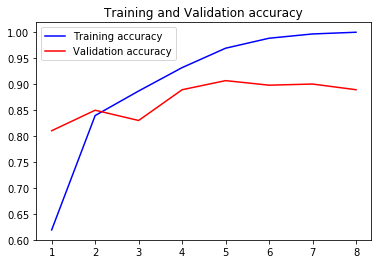

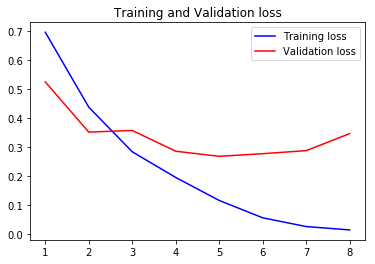

<Figure size 432x288 with 0 Axes>

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()




In [18]:
pred_y=model.predict(test_x)

print(test_y.shape)
print(pred_y.shape)


(320, 2)
(320, 2)


In [19]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(0)
    else:
        Y_pred.append(1)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(0)
    else:
        Y_test.append(1)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 

0.859375

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[125,  40],
       [ 16, 139]])

# Data Augumenation 1

In [20]:
train_dir = 'trainpreview'
train_imgs = ['trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
random.shuffle(train_imgs)
length_train = len(train_imgs)


In [21]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

<class 'numpy.ndarray'>
(9121, 224, 224, 3)


In [22]:
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(test_imgs)
length_test= len(test_imgs)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [23]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)

9121
<class 'list'>
9121
<class 'numpy.ndarray'>
(9121,)
<class 'numpy.ndarray'>
(9121, 2)


In [24]:
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)

320
<class 'list'>
320
<class 'numpy.ndarray'>
(320,)
<class 'numpy.ndarray'>
(320, 2)


In [65]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test = model.predict(test_img)
print(features_train.shape)



KeyboardInterrupt: 

In [64]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.05, random_state=42)
print(len(X_train))
print(X_train.shape)

17293
(17293, 25088)


In [42]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=128,epochs=20,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])


#history = model.fit(X_train, Y_train, epochs=5, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 8208 samples, validate on 913 samples
Epoch 1/20
8208/8208 [==============================] - 19s 2ms/sample - loss: 0.5274 - accuracy: 0.7404 - val_loss: 0.3841 - val_accuracy: 0.8291
Epoch 2/20
8208/8208 [==============================] - 19s 2ms/sample - loss: 0.3408 - accuracy: 0.8607 - val_loss: 0.3538 - val_accuracy: 0.8510
Epoch 3/20
8208/8208 [==============================] - 19s 2ms/sample - loss: 0.3110 - accuracy: 0.8731 - val_loss: 0.3593 - val_accuracy: 0.8379
Epoch 4/20
8208/8208 [==============================] - 18s 2ms/sample - loss: 0.3239 - accuracy: 0.8676 - val_loss: 0.4040 - val_accuracy: 0.8204
Epoch 5/20
8208/8208 [==============================] - 18s 2ms/sample - loss: 0.3098 - accuracy: 0.8744 - val_loss: 0.3554 - val_accuracy: 0.8291


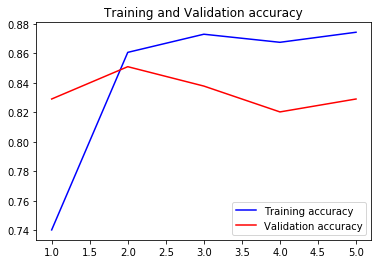

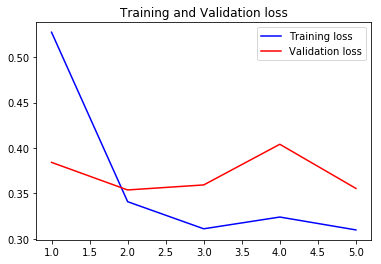

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [44]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
        
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

(320, 2)
(320, 2)
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 

0.83125

# Data Augumentation 2

In [48]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

In [49]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(18204, 224, 224, 3)
<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [50]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)

18204
<class 'list'>
18204
<class 'numpy.ndarray'>
(18204,)
<class 'numpy.ndarray'>
(18204, 2)
320
<class 'list'>
320
<class 'numpy.ndarray'>
(320,)
<class 'numpy.ndarray'>
(320, 2)


In [51]:
# loading VGG19 model weights
model = VGG19(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)

(18204, 7, 7, 512)


In [78]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.1, random_state=42)
print(len(X_train))
print(X_train.shape)

16383
(16383, 25088)


In [91]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, Y_train,batch_size=256,epochs=50,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train, epochs=10, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 16383 samples, validate on 1821 samples
Epoch 1/50
16383/16383 [==============================] - 12s 755us/sample - loss: 0.5982 - accuracy: 0.6979 - val_loss: 0.4303 - val_accuracy: 0.8105
Epoch 2/50
16383/16383 [==============================] - 11s 663us/sample - loss: 0.3404 - accuracy: 0.8613 - val_loss: 0.3555 - val_accuracy: 0.8506
Epoch 3/50
16383/16383 [==============================] - 11s 666us/sample - loss: 0.2710 - accuracy: 0.8912 - val_loss: 0.3261 - val_accuracy: 0.8622
Epoch 4/50
16383/16383 [==============================] - 11s 661us/sample - loss: 0.2240 - accuracy: 0.9139 - val_loss: 0.2969 - val_accuracy: 0.8797
Epoch 5/50
16383/16383 [==============================] - 11s 662us/sample - loss: 0.1908 - accuracy: 0.9299 - val_loss: 0.2882 - val_accuracy: 0.8957
Epoch 6/50
16383/16383 [==============================] - 11s 662us/sample - loss: 0.1536 - accuracy: 0.9432 - val_loss: 0.3126 - val_accuracy: 0.8863
Epoch 7/50
16383/16383 [=====================

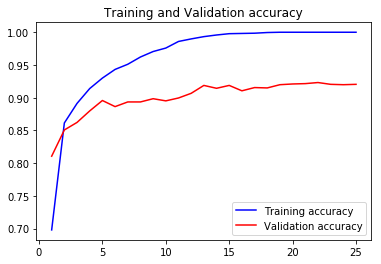

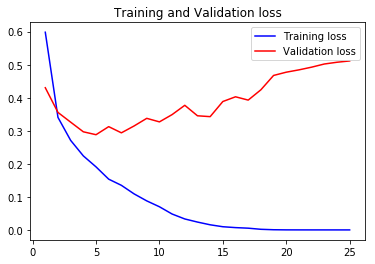

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[127,  28],
       [ 19, 146]])

In [94]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)



(320, 2)
(320, 2)


In [95]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 

0.828125

Result 1

In [87]:
0.853125

0.853125

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[89, 16],
       [12, 93]])

# Data Augumentation 3

In [4]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

In [8]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(17037, 224, 224, 3)
<class 'numpy.ndarray'>
(210, 224, 224, 3)


In [9]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)



17037
<class 'list'>
17037
<class 'numpy.ndarray'>
(17037,)
<class 'numpy.ndarray'>
(17037, 2)
210
<class 'list'>
210
<class 'numpy.ndarray'>
(210,)
<class 'numpy.ndarray'>
(210, 2)


In [10]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)

(17037, 7, 7, 512)


In [61]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.05, random_state=42)
print(len(X_train))
print(X_train.shape)

16185
(16185, 25088)


In [62]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


history = model.fit(X_train, Y_train, epochs=5, batch_size=256,validation_data=(X_valid,Y_valid))

Train on 16185 samples, validate on 852 samples
Epoch 1/5
16185/16185 [==============================] - 13s 790us/sample - loss: 0.5633 - accuracy: 0.7288 - val_loss: 0.3956 - val_accuracy: 0.8427
Epoch 2/5
16185/16185 [==============================] - 11s 710us/sample - loss: 0.2867 - accuracy: 0.8951 - val_loss: 0.3157 - val_accuracy: 0.8732
Epoch 3/5
16185/16185 [==============================] - 11s 670us/sample - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.2818 - val_accuracy: 0.8779
Epoch 4/5
16185/16185 [==============================] - 11s 671us/sample - loss: 0.1851 - accuracy: 0.9343 - val_loss: 0.2822 - val_accuracy: 0.8885
Epoch 5/5
16185/16185 [==============================] - 11s 683us/sample - loss: 0.1691 - accuracy: 0.9406 - val_loss: 0.2296 - val_accuracy: 0.9131


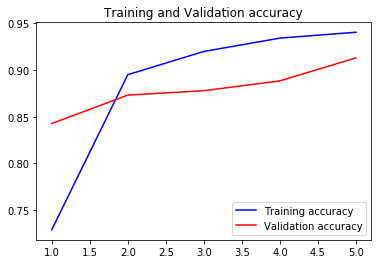

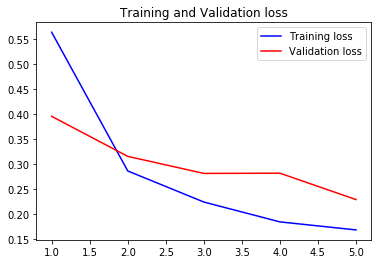

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [64]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)



(210, 2)
(210, 2)


In [65]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

<class 'list'>
(210,)
<class 'numpy.ndarray'>
[0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1]
<class 'list'>
(210,)
<class 'numpy.ndarray'>
[0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1]


0.819047619047619

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[76, 29],
       [ 9, 96]])